<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> YouTube Sentiment Analysis System</b></div>

<div style="width:100%;text-align:center"> 
<img align=middle src = "https://ichef.bbci.co.uk/news/976/cpsprodpb/13B2F/production/_127678608_gettyimages-1244636244.jpg" width="500px">
</div>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Sentiment Analysis System using Bag of Words and TFIDF Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        positive         
        neutral             
        negative          
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [2]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'prettytable'

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Read The Dataset</b></div>

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

In [2]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
dataset1 = pd.read_excel('Comments-English-leak.xlsx')
dataset2 = pd.read_excel('Comments-English-Bioweapon.xlsx')
dataset3 = pd.read_excel('Comments-English-5G.xlsx')
dataset4 = pd.read_excel('Comments-English-lab.xlsx')
dataset5 = pd.read_excel('Comments-English-populationcontrol.xlsx')
dataset6 = pd.read_excel('Comments-English-vaccinemicrochip.xlsx')

# Put them into a list
dataset = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

# Concatenate the DataFrames
dataset = pd.concat(dataset, ignore_index=True)

dataset = pd.DataFrame(dataset)

#Load the Data
print("Complete Data:")
print("=============\n")
dataset

Complete Data:



index                author            updated_at  like_count  \
0         0          @ronaldj8443  2021-08-31T20:27:33Z         0.0   
1         1          @antwalk7772  2021-08-21T16:04:56Z         0.0   
2         2              @gim7542  2021-06-08T08:26:34Z         0.0   
3         3  @johnbrittingham4471  2021-06-07T19:39:24Z         0.0   
4         4             @Sturmavk  2021-06-02T23:22:26Z         0.0   
...     ...                   ...                   ...         ...   
62410     6      @sonicwoofer2008  2020-12-17T07:42:07Z         4.0   
62411     7          @Drfresh1402  2020-11-30T00:07:16Z        21.0   
62412     8        @billhanna8838  2020-07-16T06:41:34Z        17.0   
62413     9           @JemLeavitt  2020-07-15T21:09:37Z         8.0   
62414    10      @user-xe9ez1mx8m  2020-07-15T20:50:02Z         2.0   

                                                    text     video_id public  
0                                                  liars  eBk2lK4sOZI   True  
1      They gave a piglett a virus the gives diarrhea...  eBk2lK4sOZI   True  
2      America's don't speak corona , if this is cgtn...  eBk2lK4sOZI   True  
3             She has to say that or she will disappear.  eBk2lK4sOZI   True  
4                                       You were saying?  eBk2lK4sOZI   True  
...                                                  ...          ...    ...  
62410  Who are Big pharma? Are they suppose to be dru...  yXRha_QO4lI    1.0  
62411  There is something so wrong with forcing a vac...  yXRha_QO4lI    1.0  
62412                                            DONTVAX  yXRha_QO4lI    1.0  
62413  The U.S. and current admin. has politicized th...  yXRha_QO4lI    1.0  
62414  People do nоt die frоm Covid-19, but they quic...  yXRha_QO4lI    1.0  

[62415 rows x 7 columns]

In [3]:
dataset = dataset[['updated_at', 'text']]
dataset

updated_at                                               text
0      2021-08-31T20:27:33Z                                              liars
1      2021-08-21T16:04:56Z  They gave a piglett a virus the gives diarrhea...
2      2021-06-08T08:26:34Z  America's don't speak corona , if this is cgtn...
3      2021-06-07T19:39:24Z         She has to say that or she will disappear.
4      2021-06-02T23:22:26Z                                   You were saying?
...                     ...                                                ...
62410  2020-12-17T07:42:07Z  Who are Big pharma? Are they suppose to be dru...
62411  2020-11-30T00:07:16Z  There is something so wrong with forcing a vac...
62412  2020-07-16T06:41:34Z                                            DONTVAX
62413  2020-07-15T21:09:37Z  The U.S. and current admin. has politicized th...
62414  2020-07-15T20:50:02Z  People do nоt die frоm Covid-19, but they quic...

[62415 rows x 2 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding (Before Data Preprocessing)</b></div>

In [4]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (62415, 2)


In [5]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['updated_at', 'text'], dtype='object')


In [6]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

updated_at    object
text          object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:15px ; color:#034914">

**text**<br>
* In a quick review we can observe basic information <br>
* But we are going to create a function to show of more details such as<br>
Volume of null values and its percentage , Volume of duplicated and percentage of duplicated values

</div>

In [7]:
dataset.describe(include='all')

updated_at       text
count                  62414      62408
unique                 59790      59146
top     2023-12-18T18:16:30Z  Fake news
freq                      13         52

In [8]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**text**<br>
* We can see that very small number of data are missed and duplicated which can easily be dropped.

</div>

In [9]:
show_details(dataset)

updated_at         text
Missed_Values           1.000000     7.000000
Missed_Values %         0.000016     0.000112
Duplicated values    2111.000000  2111.000000
Duplicated values %     0.033822     0.033822

In [10]:
dataset

updated_at                                               text
0      2021-08-31T20:27:33Z                                              liars
1      2021-08-21T16:04:56Z  They gave a piglett a virus the gives diarrhea...
2      2021-06-08T08:26:34Z  America's don't speak corona , if this is cgtn...
3      2021-06-07T19:39:24Z         She has to say that or she will disappear.
4      2021-06-02T23:22:26Z                                   You were saying?
...                     ...                                                ...
62410  2020-12-17T07:42:07Z  Who are Big pharma? Are they suppose to be dru...
62411  2020-11-30T00:07:16Z  There is something so wrong with forcing a vac...
62412  2020-07-16T06:41:34Z                                            DONTVAX
62413  2020-07-15T21:09:37Z  The U.S. and current admin. has politicized th...
62414  2020-07-15T20:50:02Z  People do nоt die frоm Covid-19, but they quic...

[62415 rows x 2 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Preprocessing</b></div>

## Remove Duplicate, Null, and Missing Values

In [11]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
show_details(dataset)

updated_at  text
Missed_Values               0.0   0.0
Missed_Values %             0.0   0.0
Duplicated values           0.0   0.0
Duplicated values %         0.0   0.0

In [12]:
dataset

updated_at                                               text
0      2021-08-31T20:27:33Z                                              liars
1      2021-08-21T16:04:56Z  They gave a piglett a virus the gives diarrhea...
2      2021-06-08T08:26:34Z  America's don't speak corona , if this is cgtn...
3      2021-06-07T19:39:24Z         She has to say that or she will disappear.
4      2021-06-02T23:22:26Z                                   You were saying?
...                     ...                                                ...
62410  2020-12-17T07:42:07Z  Who are Big pharma? Are they suppose to be dru...
62411  2020-11-30T00:07:16Z  There is something so wrong with forcing a vac...
62412  2020-07-16T06:41:34Z                                            DONTVAX
62413  2020-07-15T21:09:37Z  The U.S. and current admin. has politicized th...
62414  2020-07-15T20:50:02Z  People do nоt die frоm Covid-19, but they quic...

[60300 rows x 2 columns]

In [13]:
# Reset the index of the merged DataFrame
dataset.reset_index(drop=True, inplace=True)
dataset

updated_at                                               text
0      2021-08-31T20:27:33Z                                              liars
1      2021-08-21T16:04:56Z  They gave a piglett a virus the gives diarrhea...
2      2021-06-08T08:26:34Z  America's don't speak corona , if this is cgtn...
3      2021-06-07T19:39:24Z         She has to say that or she will disappear.
4      2021-06-02T23:22:26Z                                   You were saying?
...                     ...                                                ...
60295  2020-12-17T07:42:07Z  Who are Big pharma? Are they suppose to be dru...
60296  2020-11-30T00:07:16Z  There is something so wrong with forcing a vac...
60297  2020-07-16T06:41:34Z                                            DONTVAX
60298  2020-07-15T21:09:37Z  The U.S. and current admin. has politicized th...
60299  2020-07-15T20:50:02Z  People do nоt die frоm Covid-19, but they quic...

[60300 rows x 2 columns]

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


In [16]:
# Apply the Preprocessing on Input Data Comments of Training Data
dataset['text'] = dataset['text'].apply(data_preprocessing)

print("\nTraining Data After Pre-processing:")
print("====================================\n")
dataset


Training Data After Pre-processing:



updated_at                                               text
0      2021-08-31T20:27:33Z                                              liars
1      2021-08-21T16:04:56Z  gave piglett virus gives diarrhea death named ...
2      2021-06-08T08:26:34Z  americas dont speak corona cgtn american engli...
3      2021-06-07T19:39:24Z                                      say disappear
4      2021-06-02T23:22:26Z                                             saying
...                     ...                                                ...
60295  2020-12-17T07:42:07Z         big pharma suppose drug competitors biased
60296  2020-11-30T00:07:16Z         something wrong forcing vaccine population
60297  2020-07-16T06:41:34Z                                            dontvax
60298  2020-07-15T21:09:37Z  current admin politicized pandemic despite cos...
60299  2020-07-15T20:50:02Z  people die covid quickly die quarantine wearin...

[60300 rows x 2 columns]

In [17]:
dataset

updated_at                                               text
0      2021-08-31T20:27:33Z                                              liars
1      2021-08-21T16:04:56Z  gave piglett virus gives diarrhea death named ...
2      2021-06-08T08:26:34Z  americas dont speak corona cgtn american engli...
3      2021-06-07T19:39:24Z                                      say disappear
4      2021-06-02T23:22:26Z                                             saying
...                     ...                                                ...
60295  2020-12-17T07:42:07Z         big pharma suppose drug competitors biased
60296  2020-11-30T00:07:16Z         something wrong forcing vaccine population
60297  2020-07-16T06:41:34Z                                            dontvax
60298  2020-07-15T21:09:37Z  current admin politicized pandemic despite cos...
60299  2020-07-15T20:50:02Z  people die covid quickly die quarantine wearin...

[60300 rows x 2 columns]

In [18]:
def filter_texts_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'text' column
    dataset['Num_Words'] = dataset['text'].apply(lambda x: len(str(x).split()))
    
    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = dataset[dataset['Num_Words'] >= min_words].copy()
    
    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])
    
    return filtered_dataset

dataset = filter_texts_by_word_count(dataset)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
dataset.head()

Dataset Data:



updated_at                                               text
1  2021-08-21T16:04:56Z  gave piglett virus gives diarrhea death named ...
2  2021-06-08T08:26:34Z  americas dont speak corona cgtn american engli...
5  2021-05-27T02:43:10Z  meteoroid carried covid earth theory matches e...
6  2021-05-25T13:32:52Z          haha china pay tragedy caused whole world
7  2021-05-25T03:15:42Z                    liar liar complete incompetence

In [19]:
dataset.reset_index(drop=True)
dataset

updated_at                                               text
1      2021-08-21T16:04:56Z  gave piglett virus gives diarrhea death named ...
2      2021-06-08T08:26:34Z  americas dont speak corona cgtn american engli...
5      2021-05-27T02:43:10Z  meteoroid carried covid earth theory matches e...
6      2021-05-25T13:32:52Z          haha china pay tragedy caused whole world
7      2021-05-25T03:15:42Z                    liar liar complete incompetence
...                     ...                                                ...
60294  2020-12-17T07:44:15Z  hello black guy business school medical freak ...
60295  2020-12-17T07:42:07Z         big pharma suppose drug competitors biased
60296  2020-11-30T00:07:16Z         something wrong forcing vaccine population
60298  2020-07-15T21:09:37Z  current admin politicized pandemic despite cos...
60299  2020-07-15T20:50:02Z  people die covid quickly die quarantine wearin...

[52952 rows x 2 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Sentiment Analysis using VADER</b></div>

## Objective
The model utilizes the VADER architecture and is trained on a dataset of user comments with sentiment labels.

The model is capable of analyzing comments and extracting sentiments such as positive, negative, or neutral.

## Features
Sentiment Classification: The model can classify user comments into positive, negative, or neutral sentiments, providing an overall indication of the expressed opinion.

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to assign sentiment labels
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply VADER sentiment analysis and add labels to the DataFrame
dataset['Sentiment_score'] = dataset['text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
dataset['Sentiment'] = dataset['Sentiment_score'].apply(get_sentiment_label)

In [21]:
dataset = dataset.reset_index(drop=True)
dataset

updated_at  \
0      2021-08-21T16:04:56Z   
1      2021-06-08T08:26:34Z   
2      2021-05-27T02:43:10Z   
3      2021-05-25T13:32:52Z   
4      2021-05-25T03:15:42Z   
...                     ...   
52947  2020-12-17T07:44:15Z   
52948  2020-12-17T07:42:07Z   
52949  2020-11-30T00:07:16Z   
52950  2020-07-15T21:09:37Z   
52951  2020-07-15T20:50:02Z   

                                                    text  Sentiment_score  \
0      gave piglett virus gives diarrhea death named ...          -0.0772   
1      americas dont speak corona cgtn american engli...           0.0000   
2      meteoroid carried covid earth theory matches e...          -0.5106   
3              haha china pay tragedy caused whole world          -0.4215   
4                        liar liar complete incompetence          -0.8720   
...                                                  ...              ...   
52947  hello black guy business school medical freak ...          -0.4404   
52948         big pharma suppose drug competitors biased          -0.2732   
52949         something wrong forcing vaccine population          -0.4767   
52950  current admin politicized pandemic despite cos...           0.0000   
52951  people die covid quickly die quarantine wearin...          -0.9485   

      Sentiment  
0      Negative  
1       Neutral  
2      Negative  
3      Negative  
4      Negative  
...         ...  
52947  Negative  
52948  Negative  
52949  Negative  
52950   Neutral  
52951  Negative  

[52952 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding and Exploratory Data Analysis(After Data Preprocessing)</b></div>

In [22]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(dataset.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(dataset.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['updated_at', 'text', 'Sentiment_score', 'Sentiment'], dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 52952


In [23]:
dataset.describe()

Sentiment_score
count     52952.000000
mean         -0.074863
std           0.499415
min          -0.999600
25%          -0.493900
50%           0.000000
75%           0.318200
max           0.999700

In [24]:
print('The Count of sentiments in the dataset : \n')
Sentiment =dataset.Sentiment.value_counts()
Sentiment.to_frame().T

The Count of sentiments in the dataset : 



Negative  Positive  Neutral
Sentiment     23958     18399    10595

In [25]:
print(f'The unique values of Sentiments : {len(dataset.Sentiment.unique())}')
print('**' * 20)
print(dataset.Sentiment.unique())

The unique values of Sentiments : 3
****************************************
['Negative' 'Neutral' 'Positive']



Number of instances and Classes in Training Dataset:



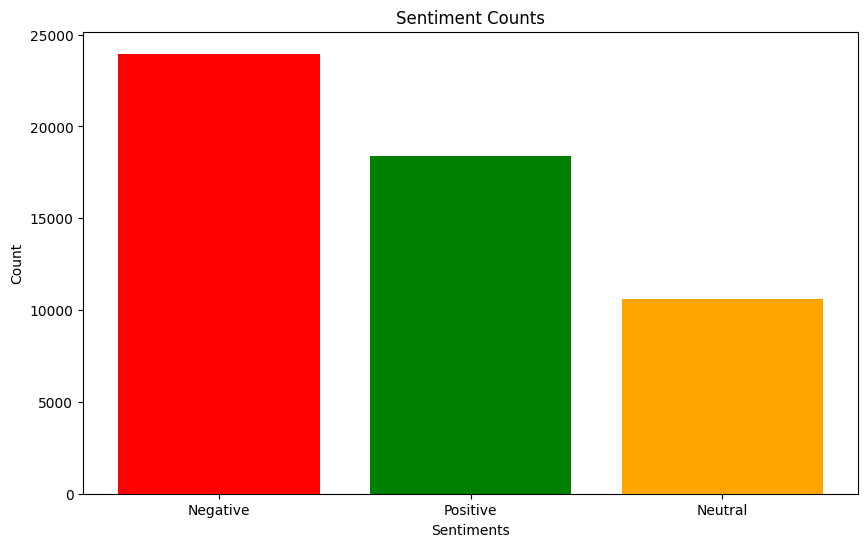

In [26]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = dataset['Sentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the bar graph
plt.show()


In [27]:
import plotly.graph_objects as go

sentiment_counts = dataset['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']


fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Comments in YouTube',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()


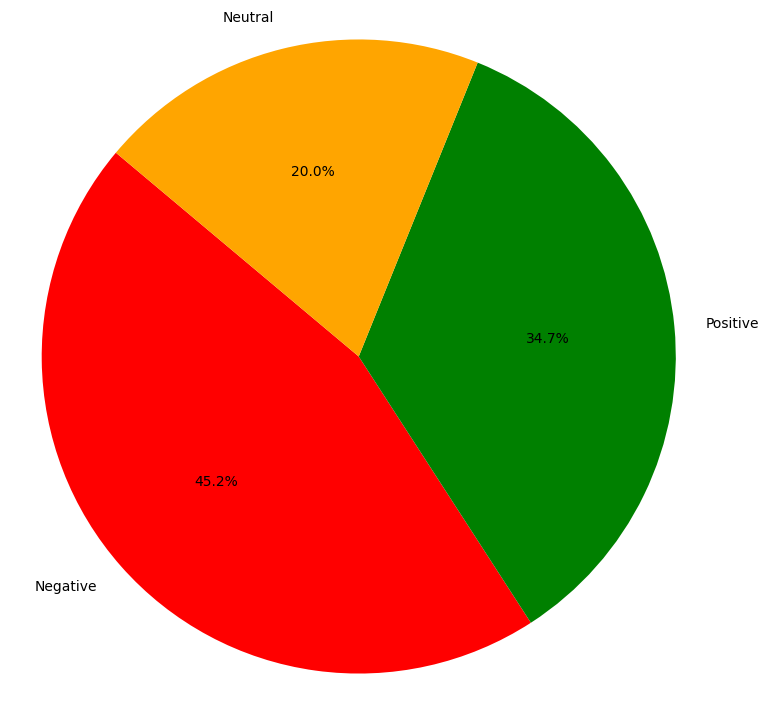

In [28]:
sentiment_counts = dataset['Sentiment'].value_counts()

# Define colors for each sentiment
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'orange'}

# Create a pie chart with custom colors
plt.figure(figsize=(9, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [29]:
# Convert 'text_DateTime' column to datetime format
dataset['updated_at'] = pd.to_datetime(dataset['updated_at'])

# Extract only the date part
dataset['updated_at'] = dataset['updated_at'].dt.date
dataset

updated_at                                               text  \
0      2021-08-21  gave piglett virus gives diarrhea death named ...   
1      2021-06-08  americas dont speak corona cgtn american engli...   
2      2021-05-27  meteoroid carried covid earth theory matches e...   
3      2021-05-25          haha china pay tragedy caused whole world   
4      2021-05-25                    liar liar complete incompetence   
...           ...                                                ...   
52947  2020-12-17  hello black guy business school medical freak ...   
52948  2020-12-17         big pharma suppose drug competitors biased   
52949  2020-11-30         something wrong forcing vaccine population   
52950  2020-07-15  current admin politicized pandemic despite cos...   
52951  2020-07-15  people die covid quickly die quarantine wearin...   

       Sentiment_score Sentiment  
0              -0.0772  Negative  
1               0.0000   Neutral  
2              -0.5106  Negative  
3              -0.4215  Negative  
4              -0.8720  Negative  
...                ...       ...  
52947          -0.4404  Negative  
52948          -0.2732  Negative  
52949          -0.4767  Negative  
52950           0.0000   Neutral  
52951          -0.9485  Negative  

[52952 rows x 4 columns]

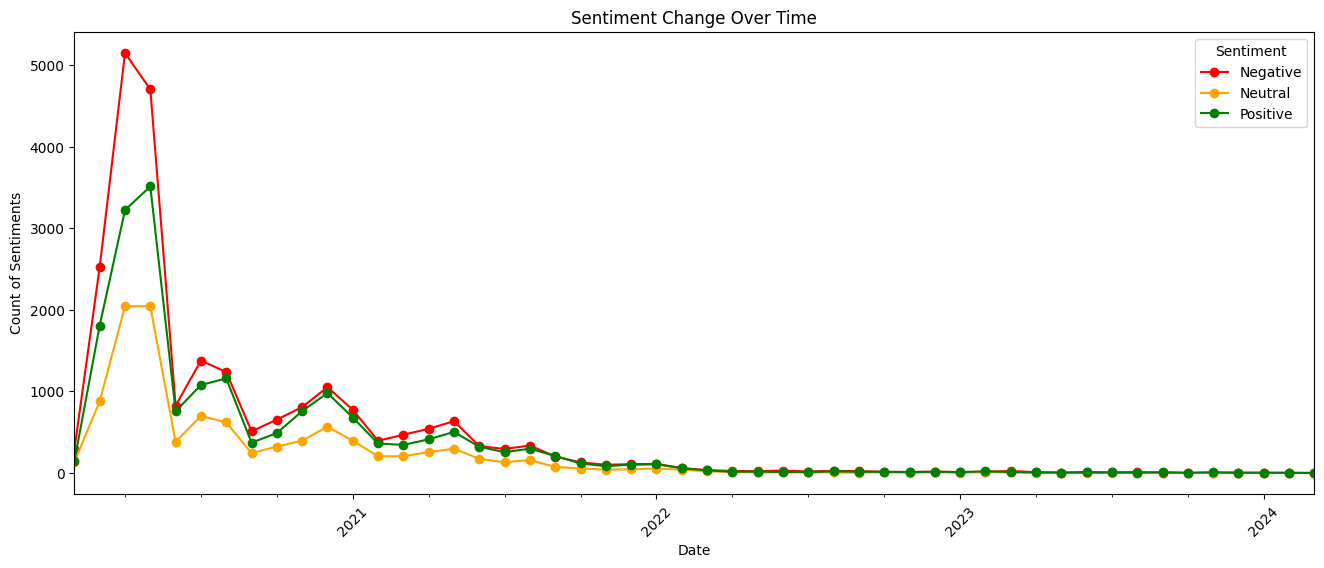

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have defined the colors dictionary
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'orange'}

dataset['updated_at'] = pd.to_datetime(dataset['updated_at'])  # Convert 'published' to datetime

# Grouping sentiments by month and counting their occurrences
sentiments_over_time = dataset.groupby([dataset['updated_at'].dt.to_period('M'), 'Sentiment']).size().unstack().fillna(0)

# Plotting sentiments over time with adjusted figure size directly in plot function
ax = sentiments_over_time.plot(kind='line', marker='o', figsize=(16, 6))

plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Sentiment Change Over Time')

# Set color for each sentiment label
for sentiment, color in colors.items():
    ax.lines[sentiments_over_time.columns.get_loc(sentiment)].set_color(color)

plt.legend(title='Sentiment')
plt.show()


In [31]:
# Replace 'df' with the name of your DataFrame
dataset.to_csv('YTSentimentdata.csv', index=False)

## Shape of the Training Data

In [32]:
dataset.shape

(52952, 4)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [33]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_dataset = dataset
Tokens = preprocessed_dataset['text'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_dataset["Sentiment"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_dataset['text'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


Training Data After Tokenization :



text Sentiment  \
0  [gave, piglett, virus, gives, diarrhea, death,...  Negative   
1  [americas, dont, speak, corona, cgtn, american...   Neutral   
2  [meteoroid, carried, covid, earth, theory, mat...  Negative   

                                        Token_Length  
0  [4, 7, 5, 5, 8, 5, 5, 4, 5, 3, 5, 8, 7, 4, 6, ...  
1                           [8, 4, 5, 6, 4, 8, 7, 6]  
2                     [9, 7, 5, 5, 6, 7, 8, 4, 5, 5]

### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [34]:
preprocessed_dataset['text length'] = preprocessed_dataset['text'].astype(str).apply(len)
preprocessed_dataset['word_count'] = preprocessed_dataset['text'].apply(lambda x: len(str(x).split()))
preprocessed_dataset.head(3)

updated_at                                               text  \
0 2021-08-21  gave piglett virus gives diarrhea death named ...   
1 2021-06-08  americas dont speak corona cgtn american engli...   
2 2021-05-27  meteoroid carried covid earth theory matches e...   

   Sentiment_score Sentiment  text length  word_count  
0          -0.0772  Negative          179          28  
1           0.0000   Neutral           55           8  
2          -0.5106  Negative           70          10

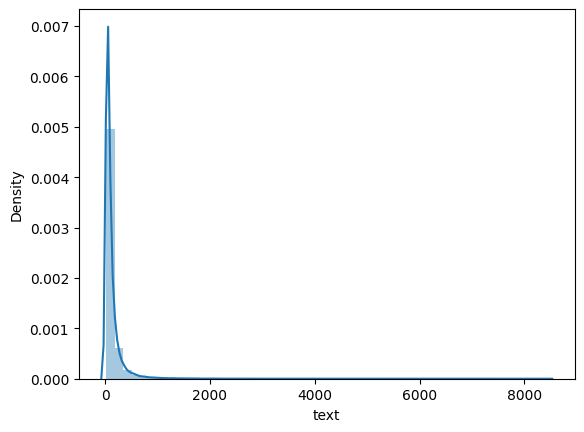

In [35]:
import seaborn as sns
text_length=preprocessed_dataset['text'].str.len()
sns.distplot(text_length)
plt.show()

In [36]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

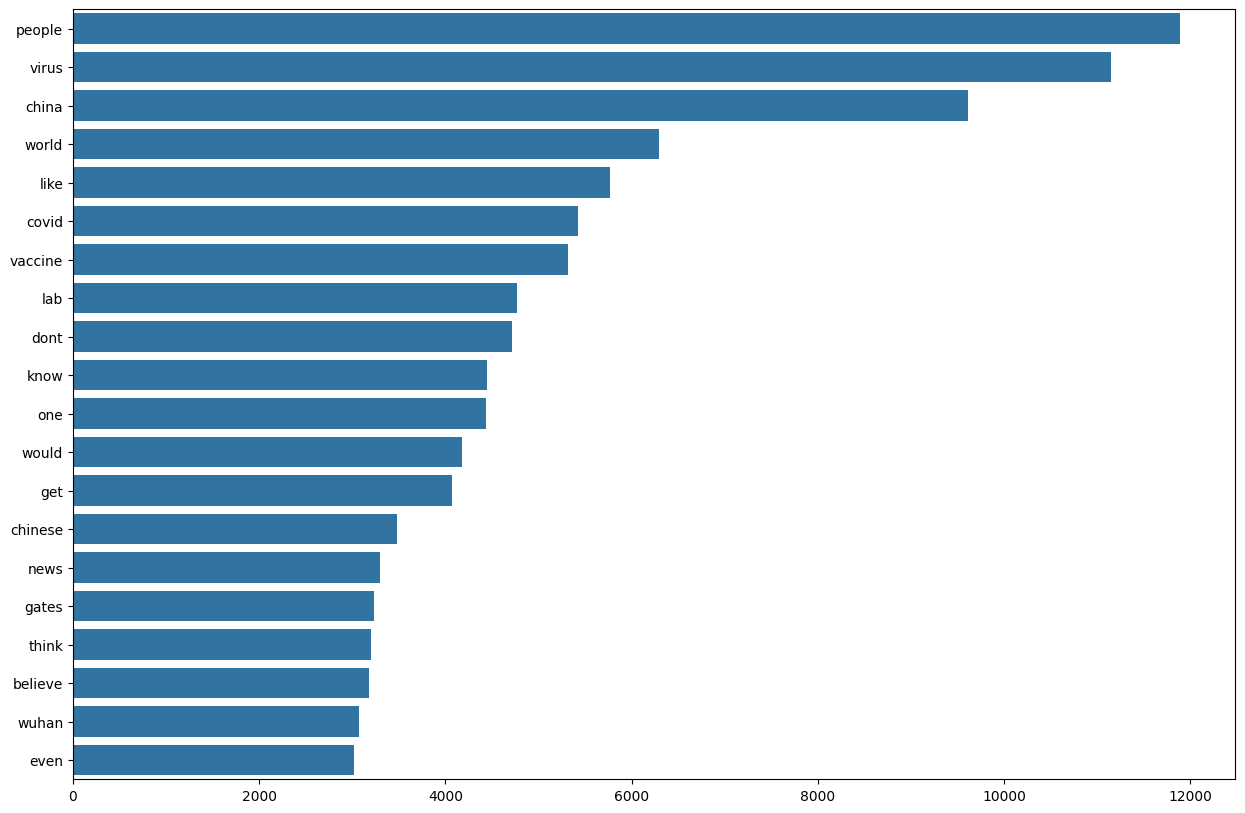

In [37]:
plot_top_non_stopwords_barchart(preprocessed_dataset['text'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Positive Data

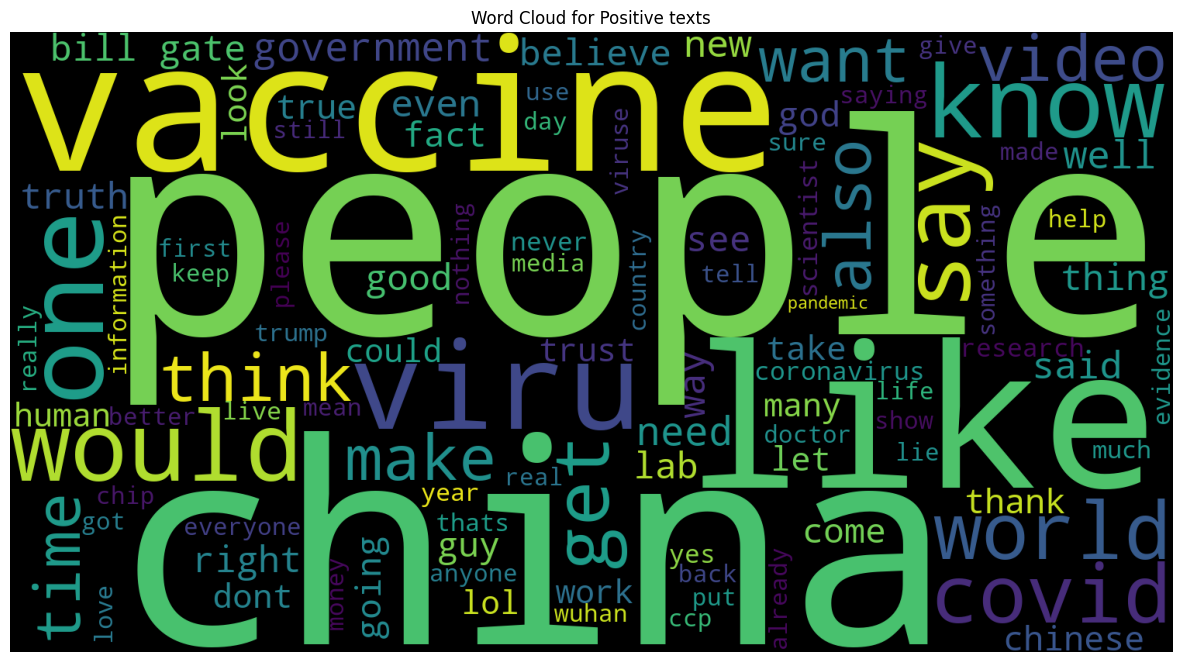

In [38]:
from wordcloud import WordCloud
stopwords_list = stopwords.words('english')
positive_reviews = dataset[dataset['Sentiment'] == 'Positive']['text']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive texts')
plt.axis('off')
plt.show()


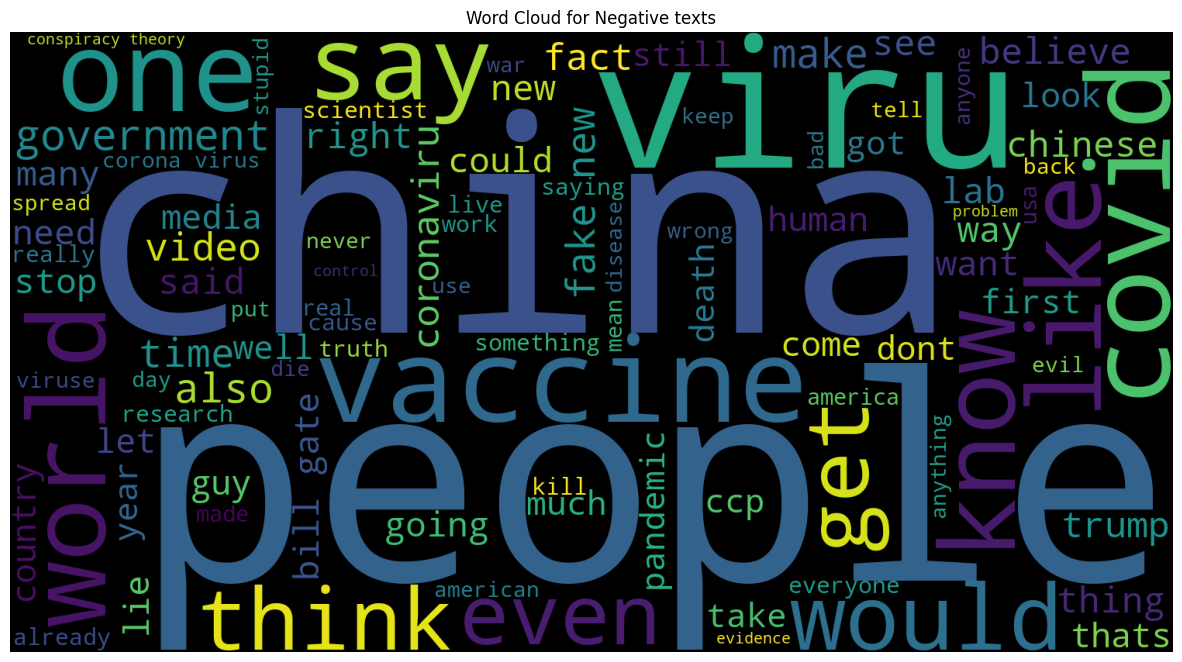

In [39]:
negative_reviews = dataset[dataset['Sentiment'] == 'Negative']['text']
pos = ' '.join(map(str, negative_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative texts')
plt.axis('off')
plt.show()

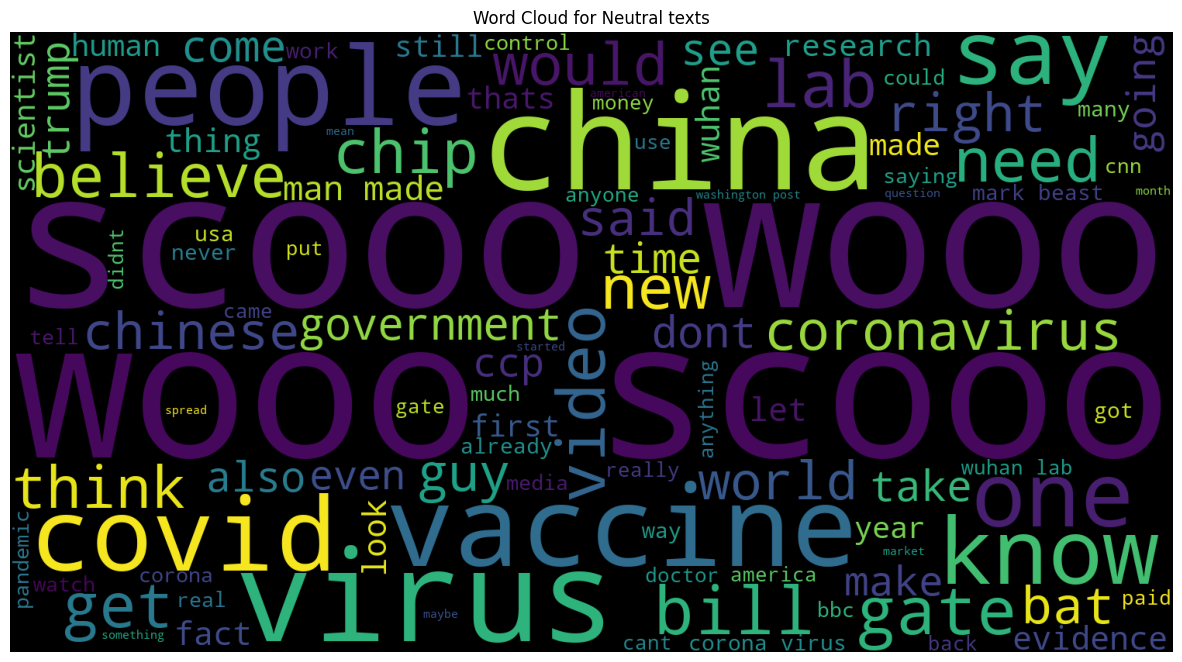

In [40]:
neutral_reviews = dataset[dataset['Sentiment'] == 'Neutral']['text']
pos = ' '.join(map(str, neutral_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral texts')
plt.axis('off')
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [41]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_dataset['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
df1

Word  count
0    people  11893
1     virus  11153
2     china   9611
3     world   6299
4      like   5764
5     covid   5430
6   vaccine   5318
7       lab   4767
8      dont   4719
9      know   4446
10      one   4432
11    would   4180
12      get   4073
13  chinese   3478
14     news   3295
15    gates   3230
16    think   3206
17  believe   3185
18    wuhan   3074
19     even   3021

Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

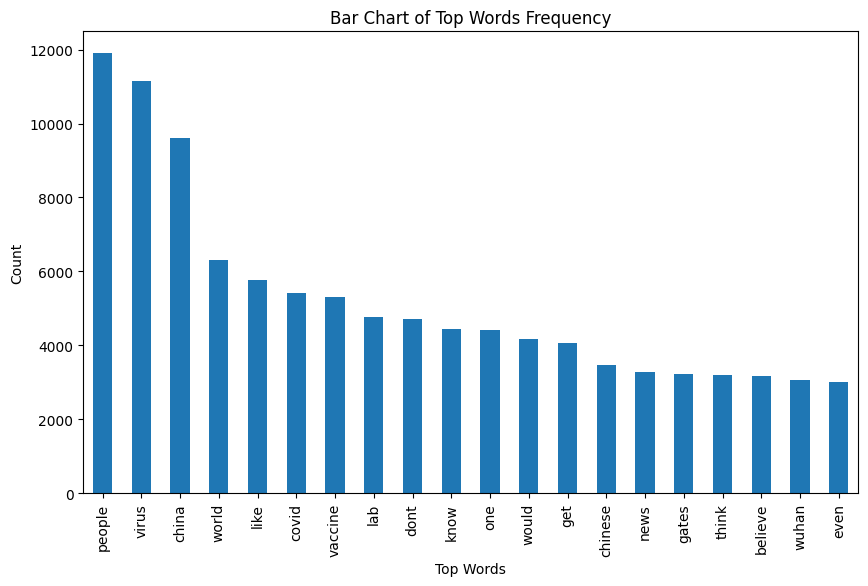

In [42]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [43]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_dataset['text'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

Text  Count
0          scooo wooo   2352
1          wooo scooo   2349
2          bill gates   2002
3           fake news   1310
4        corona virus   1012
5            man made    784
6           wuhan lab    673
7   conspiracy theory    618
8          mark beast    611
9  chinese government    566

<Axes: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

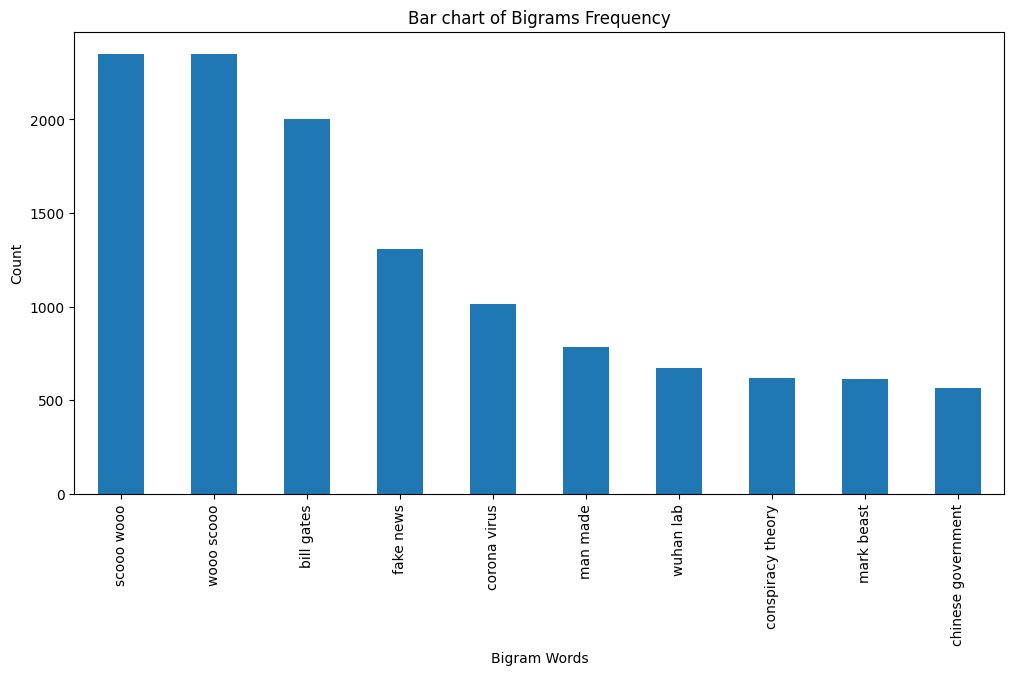

In [44]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature ExtractionMethod 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [45]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 3000) # Extract 5000 Features 
train_text = preprocessed_dataset['text']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


In [46]:
# Save the fitted vectorizer to a file
vectorizer_filename = 'trained_count_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as f:
    pickle.dump(count_vectorizer, f)

## Convert Input of Training Data into Feature Vectors

In [47]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



ability  able  absolute  absolutely  accept  accepted  access  accident  \
0        0     0         0           0       0         0       0         0   
1        0     0         0           0       0         0       0         0   
2        0     0         0           0       0         0       0         0   
3        0     0         0           0       0         0       0         0   
4        0     0         0           0       0         0       0         0   

   accidental  accidentally  ...  younger  youre  youtube  youve  yrs  yuri  \
0           0             0  ...        0      0        0      0    0     0   
1           0             0  ...        0      0        0      0    0     0   
2           0             0  ...        0      0        0      0    0     0   
3           0             0  ...        0      0        0      0    0     0   
4           0             0  ...        0      0        0      0    0     0   

   zero  zhengli  zinc  zombie  
0     0        0     0       0  
1     0        0     0       0  
2     0        0     0       0  
3     0        0     0       0  
4     0        0     0       0  

[5 rows x 3000 columns]

# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [48]:
''' 
    /*------------- SPLITTING_dataset_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

dataset_output = pd.DataFrame(preprocessed_dataset["Sentiment"])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
dataset_output.head()


Output of Training Data:



Sentiment
0  Negative
1   Neutral
2  Negative
3  Negative
4  Negative

In [49]:
preprocessed_dataset

updated_at                                               text  \
0     2021-08-21  gave piglett virus gives diarrhea death named ...   
1     2021-06-08  americas dont speak corona cgtn american engli...   
2     2021-05-27  meteoroid carried covid earth theory matches e...   
3     2021-05-25          haha china pay tragedy caused whole world   
4     2021-05-25                    liar liar complete incompetence   
...          ...                                                ...   
52947 2020-12-17  hello black guy business school medical freak ...   
52948 2020-12-17         big pharma suppose drug competitors biased   
52949 2020-11-30         something wrong forcing vaccine population   
52950 2020-07-15  current admin politicized pandemic despite cos...   
52951 2020-07-15  people die covid quickly die quarantine wearin...   

       Sentiment_score Sentiment  text length  word_count  
0              -0.0772  Negative          179          28  
1               0.0000   Neutral           55           8  
2              -0.5106  Negative           70          10  
3              -0.4215  Negative           41           7  
4              -0.8720  Negative           31           4  
...                ...       ...          ...         ...  
52947          -0.4404  Negative           52           8  
52948          -0.2732  Negative           42           6  
52949          -0.4767  Negative           42           5  
52950           0.0000   Neutral           57           7  
52951          -0.9485  Negative          162          22  

[52952 rows x 6 columns]

In [50]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
dataset_output['Sentiment'] = label_encoder.fit_transform(dataset_output['Sentiment'])

In [51]:
dataset_output

Sentiment
0              0
1              1
2              0
3              0
4              0
...          ...
52947          0
52948          0
52949          0
52950          1
52951          0

[52952 rows x 1 columns]

In [52]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Train Machine Learning Models using Training Data

## Random Forest Classifier

In [53]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Logistic Regression Classifier

In [54]:
from sklearn.linear_model import LogisticRegression
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


## Linear SVC Classifier

In [55]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


## Naive Bayes Classifier 

In [56]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## Multinomial Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [58]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.76


Precision Score of Random Forest Classifier:

0.76


Recall Score of Random Forest Classifier:

0.76


F1 Score of Random Forest Classifier:

0.76


In [59]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      4805
           1       0.77      0.84      0.80      2049
           2       0.74      0.69      0.71      3737

    accuracy                           0.76     10591
   macro avg       0.76      0.77      0.76     10591
weighted avg       0.76      0.76      0.75     10591



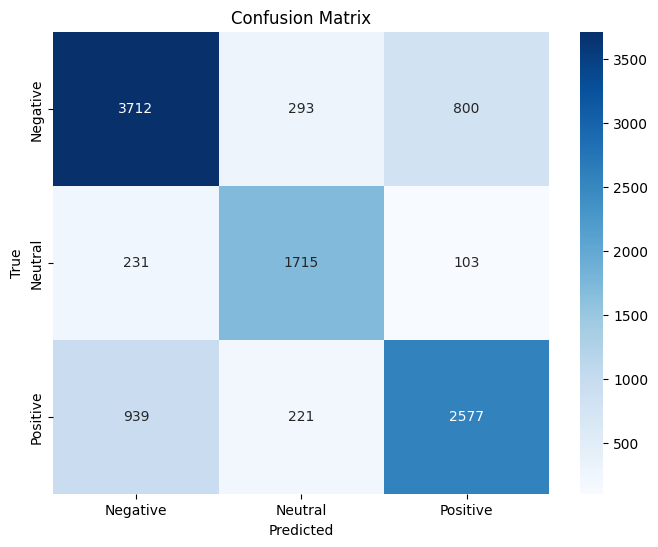

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression Classifier

In [61]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.85

precision Score of LR_claasifier:

0.85


Recall Score of LR_claasifier:

0.85


F1 Score of LR_claasifier:

0.85


In [62]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4805
           1       0.83      0.96      0.89      2049
           2       0.84      0.81      0.83      3737

    accuracy                           0.85     10591
   macro avg       0.85      0.87      0.86     10591
weighted avg       0.85      0.85      0.85     10591



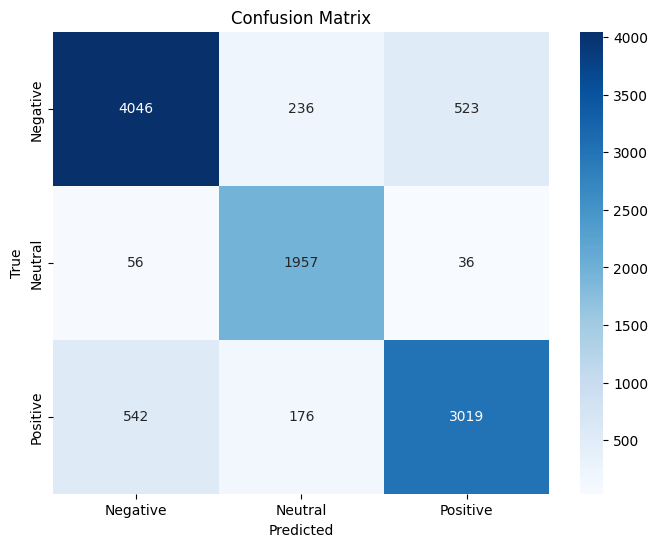

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BernoulliNB

In [64]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.65


Precision Score of BernoulliNB:

0.71


Recall Score of BernoulliNB:

0.65


F1 Score of BernoulliNB:

0.65


In [65]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      4805
           1       0.45      0.90      0.60      2049
           2       0.77      0.54      0.63      3737

    accuracy                           0.65     10591
   macro avg       0.66      0.69      0.64     10591
weighted avg       0.71      0.65      0.65     10591



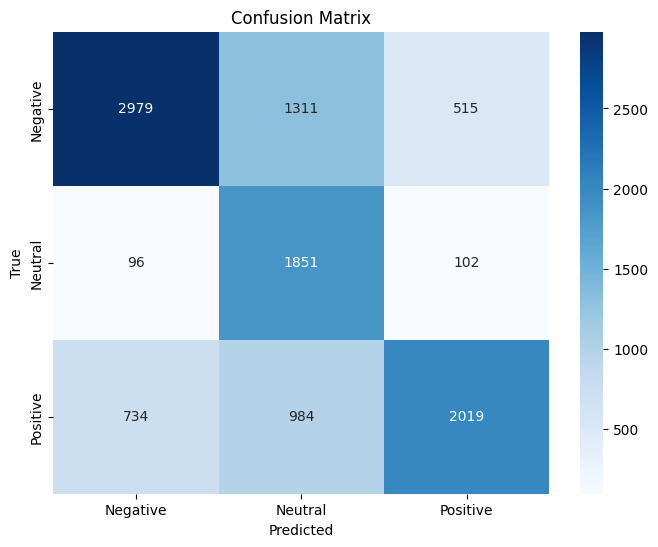

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Linear SVC

In [67]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.85

precision Score of LinearSVC:

0.85


Recall Score of LinearSVC:

0.85


F1 Score of LinearSVC:

0.85


In [68]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4805
           1       0.84      0.94      0.89      2049
           2       0.84      0.82      0.83      3737

    accuracy                           0.85     10591
   macro avg       0.85      0.87      0.86     10591
weighted avg       0.85      0.85      0.85     10591



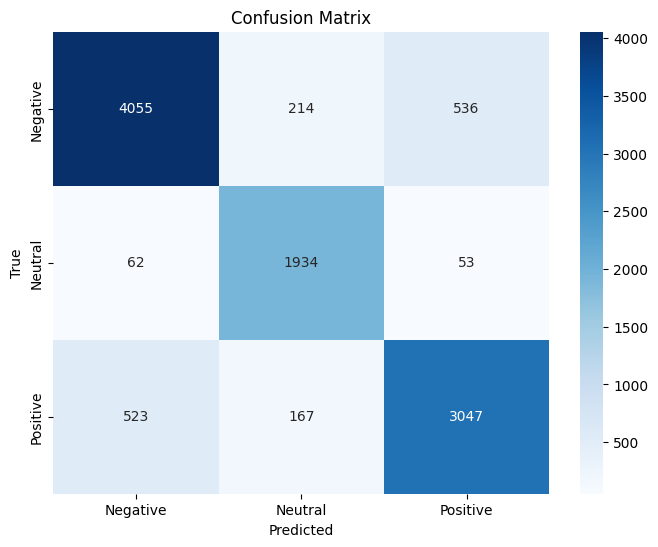

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [70]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.71

precision Score of MultinomialNB:

0.72


Recall Score of MultinomialNB:

0.71


F1 Score of MultinomialNB:

0.7


In [71]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.69      0.84      0.75      4805
           1       0.79      0.42      0.54      2049
           2       0.73      0.71      0.72      3737

    accuracy                           0.71     10591
   macro avg       0.74      0.65      0.67     10591
weighted avg       0.72      0.71      0.70     10591



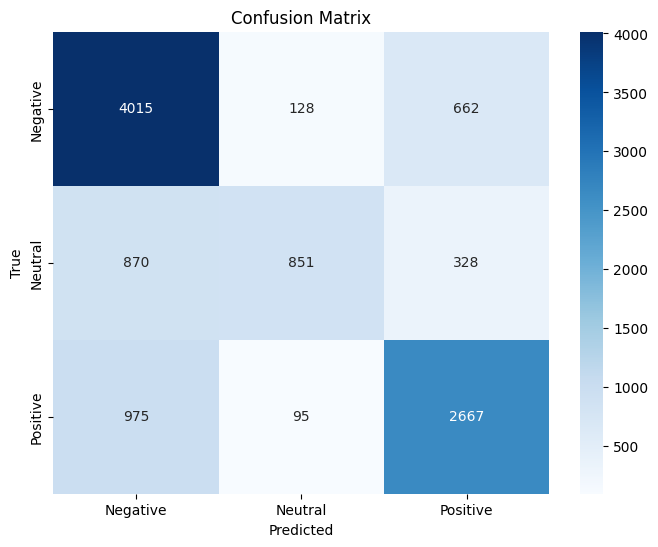

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Selection of Best Model

In [73]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.76   |    0.76   |  0.76  |   0.76   |
| Logistic Regression Classifier |   0.85   |    0.85   |  0.85  |   0.85   |
|     Bernoulli Naive Bayes      |   0.65   |    0.71   |  0.65  |   0.65   |
|           Linear SVC           |   0.85   |    0.85   |  0.85  |   0.85   |
|    Multinomial Naive Bayes     |   0.71   |    0.72   |  0.71  |   0.7    |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | f1_score |
+--------------------------------+----------+-----------+--------+----------+
| Logi

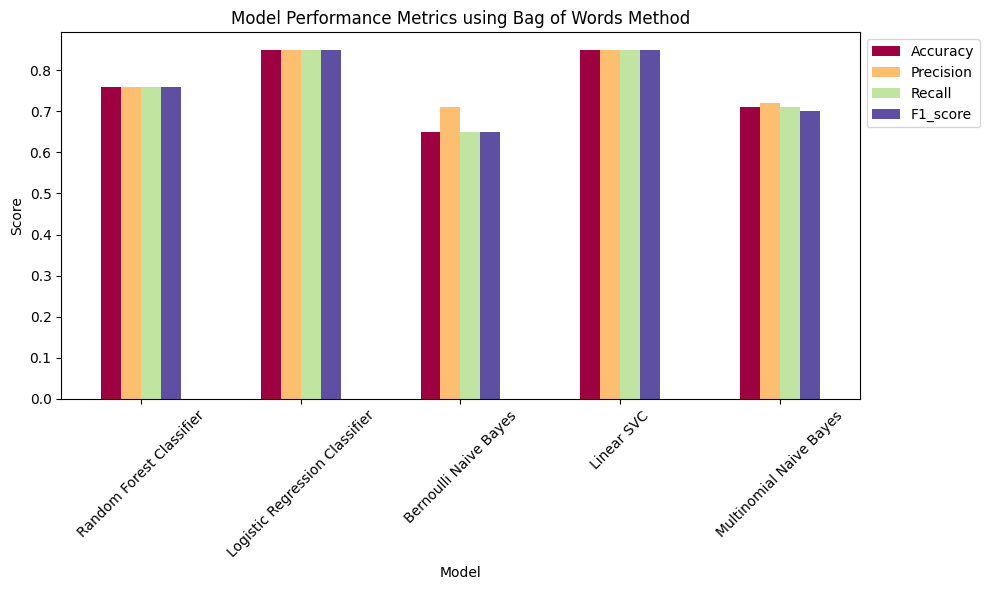

In [74]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using Bag of Words Method')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [75]:
filename = 'updatedTrainedModel.sav'
pickle.dump(random_forest_classifier, open(filename, 'wb'))

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature Extraction Method 2:Feature Extraction using Term Frequency-Inverse Document Frequency (TF-IDF) Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing (NLP) that evaluates the significance of words within a document relative to their occurrence across a collection of documents. TF-IDF measures are utilized to represent words in a numerical format, making them suitable for various text analysis tasks, including sentiment analysis and trend identification in financial data.


In [76]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TFIDFVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the TFIDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 3000) # Extract 3000 Features 
train_text = preprocessed_dataset['text']

# Fit the Tfidf Vectorizer on Input Text of Training Data
tfidf_vectorizer = tfidf_vectorizer.fit(train_text)


In [77]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = tfidf_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = tfidf_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



ability  able  absolute  absolutely  accept  accepted  access  accident  \
0      0.0   0.0       0.0         0.0     0.0       0.0     0.0       0.0   
1      0.0   0.0       0.0         0.0     0.0       0.0     0.0       0.0   
2      0.0   0.0       0.0         0.0     0.0       0.0     0.0       0.0   
3      0.0   0.0       0.0         0.0     0.0       0.0     0.0       0.0   
4      0.0   0.0       0.0         0.0     0.0       0.0     0.0       0.0   

   accidental  accidentally  ...  younger  youre  youtube  youve  yrs  yuri  \
0         0.0           0.0  ...      0.0    0.0      0.0    0.0  0.0   0.0   
1         0.0           0.0  ...      0.0    0.0      0.0    0.0  0.0   0.0   
2         0.0           0.0  ...      0.0    0.0      0.0    0.0  0.0   0.0   
3         0.0           0.0  ...      0.0    0.0      0.0    0.0  0.0   0.0   
4         0.0           0.0  ...      0.0    0.0      0.0    0.0  0.0   0.0   

   zero  zhengli  zinc  zombie  
0   0.0      0.0   0.0     0.0  
1   0.0      0.0   0.0     0.0  
2   0.0      0.0   0.0     0.0  
3   0.0      0.0   0.0     0.0  
4   0.0      0.0   0.0     0.0  

[5 rows x 3000 columns]

In [78]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Random Forest

In [79]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


In [80]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)



Accuracy Score of Random Forest Classifier:

0.75


Precision Score of Random Forest Classifier:

0.75


Recall Score of Random Forest Classifier:

0.75


F1 Score of Random Forest Classifier:

0.75


In [81]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      4805
           1       0.77      0.85      0.81      2049
           2       0.74      0.68      0.71      3737

    accuracy                           0.75     10591
   macro avg       0.75      0.77      0.76     10591
weighted avg       0.75      0.75      0.75     10591



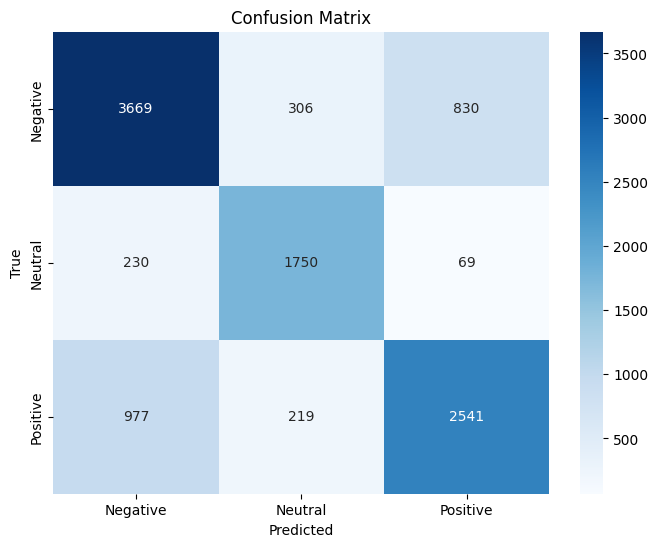

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Logistic Regression Classifier

In [83]:
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


In [84]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.85

precision Score of LR_claasifier:

0.85


Recall Score of LR_claasifier:

0.85


F1 Score of LR_claasifier:

0.85


In [85]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4805
           1       0.82      0.93      0.87      2049
           2       0.85      0.80      0.82      3737

    accuracy                           0.85     10591
   macro avg       0.84      0.86      0.85     10591
weighted avg       0.85      0.85      0.85     10591



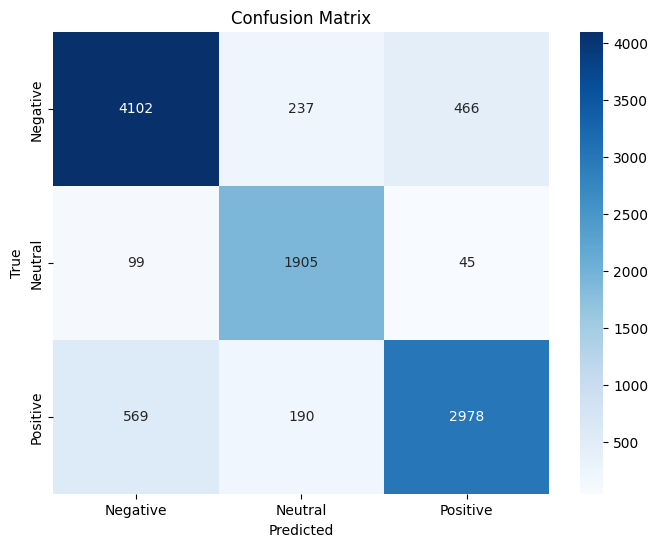

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Linear SVC

In [87]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


In [88]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.86

precision Score of LinearSVC:

0.85


Recall Score of LinearSVC:

0.86


F1 Score of LinearSVC:

0.86


In [89]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      4805
           1       0.84      0.95      0.89      2049
           2       0.85      0.82      0.83      3737

    accuracy                           0.86     10591
   macro avg       0.85      0.87      0.86     10591
weighted avg       0.86      0.86      0.86     10591



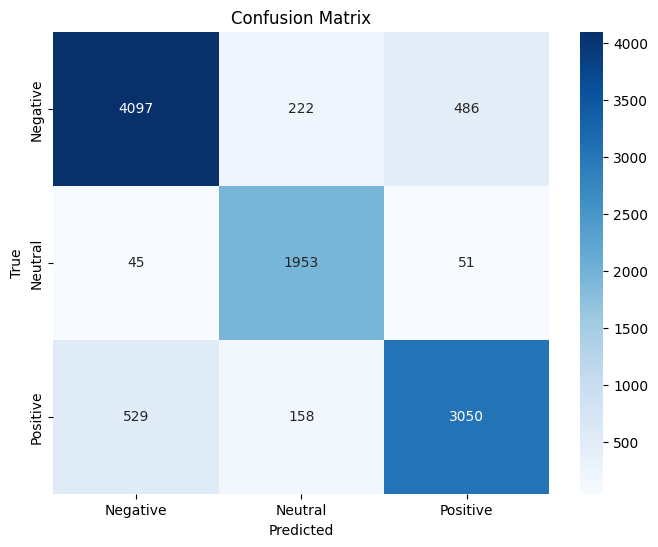

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# BernoulliNB

In [91]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


In [92]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.65


Precision Score of BernoulliNB:

0.66


Recall Score of BernoulliNB:

0.65


F1 Score of BernoulliNB:

0.65


In [93]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      4805
           1       0.45      0.90      0.60      2049
           2       0.77      0.54      0.63      3737

    accuracy                           0.65     10591
   macro avg       0.66      0.69      0.64     10591
weighted avg       0.71      0.65      0.65     10591



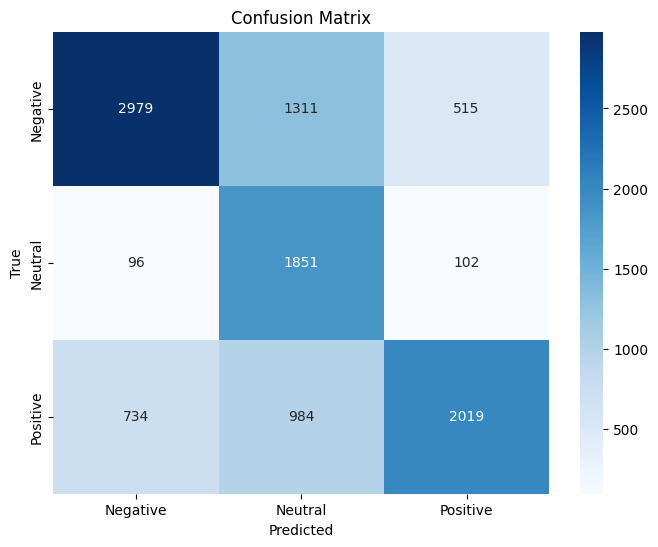

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [95]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


In [96]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.7

precision Score of MultinomialNB:

0.7


Recall Score of MultinomialNB:

0.7


F1 Score of MultinomialNB:

0.7


In [97]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75      4805
           1       0.81      0.30      0.44      2049
           2       0.79      0.65      0.71      3737

    accuracy                           0.70     10591
   macro avg       0.75      0.62      0.64     10591
weighted avg       0.73      0.70      0.68     10591



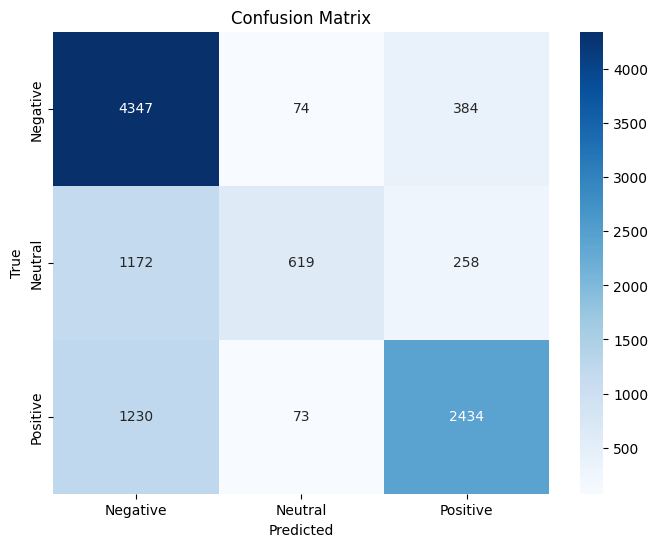

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Best Results

In [99]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.75   |    0.75   |  0.75  |   0.75   |
| Logistic Regression Classifier |   0.85   |    0.85   |  0.85  |   0.85   |
|     Bernoulli Naive Bayes      |   0.65   |    0.66   |  0.65  |   0.65   |
|           Linear SVC           |   0.86   |    0.85   |  0.86  |   0.86   |
|    Multinomial Naive Bayes     |   0.7    |    0.7    |  0.7   |   0.7    |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+------------+----------+-----------+--------+----------+
|   Model    | Accuracy | Precision | Recall | f1_score |
+------------+----------+-----------+--------+----------+
| Linear SVC |   0.86   |    0.85   |  0.86  |   0.86   |
+-------

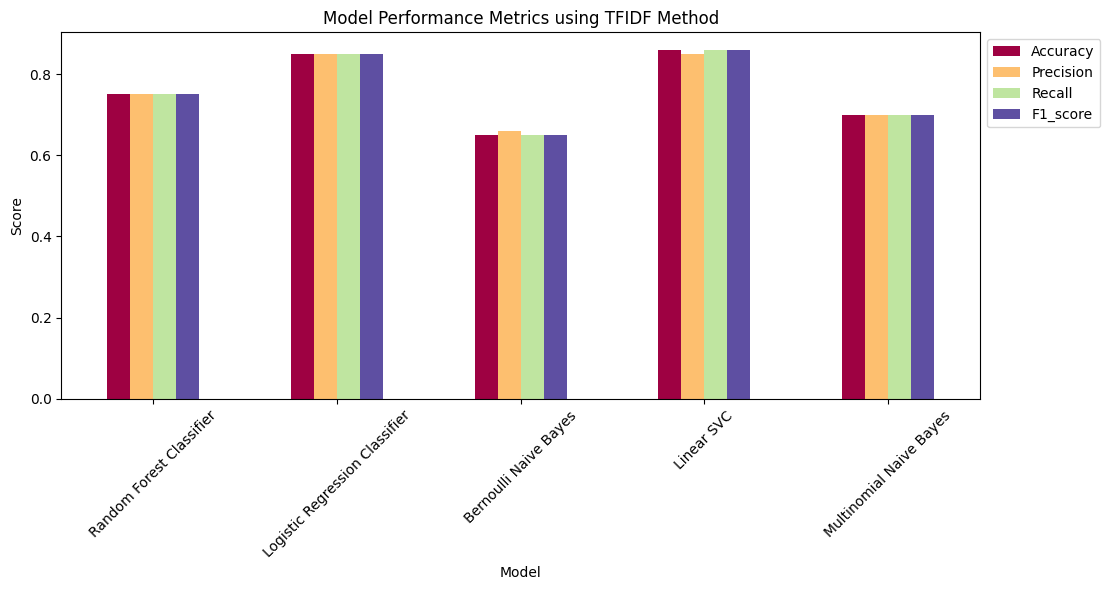

In [100]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using TFIDF Method')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Application Phase</b></div>

In [ ]:
def process_text(text):
    #store user input into numpy array
    usertext = np.empty([0,0])
    usertext = np.append(usertext, text)
    #Load saved vectorizer
    #vectorizer = pickle.load(open('trainedtfidf.pkl', 'rb'))
    fitVectorizer = count_vectorizer.transform(usertext)
    fitVectorizer = fitVectorizer.todense()
    #print(vectorizer.get_feature_names())
    countVectDF = pd.DataFrame(fitVectorizer, columns=count_vectorizer.get_feature_names_out())
    #print("\n",countVectDF)
    return countVectDF

In [ ]:
def load_Model(text):
    loadedLG = pickle.load(open(filename, 'rb'))
    outputPrediction = loadedLG.predict(process_text(text))
    return outputPrediction


In [ ]:
def make_Prediction(text):
    if text == 0:
        emotion ="Negative"
    elif text == 1:
        emotion ="Neutral"
    elif text == 2:
        emotion ="Positive"
    return emotion

In [ ]:
from tkinter import *


with open('updatedTrainedModel.sav', 'rb') as f:
    loadedLG = pickle.load(f)

In [ ]:
def detect():
    user_input = input1.get("1.0","end-1c")
    answer.config(text=make_Prediction(load_Model(user_input)))

In [ ]:
root = Tk()
root.title('Sentiment Analysis System')
root.geometry('530x430')
root.resizable(width=True, height=True)

topFrame = Frame(root)
topFrame.pack()
bottomFrame = Frame(root)
bottomFrame.pack(side=BOTTOM)

label11 = Label(root, text='Sentiment Analysis System ',font=("Times 24 bold"),fg='Dark Blue').place(x = 80,y = 10)


label1 = Label(root, text='Enter the text',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 57)
#label1.pack()

input1 = Text(root, height=6, width=40)
input1.place(x = 105,y = 90)
#input1.pack()

button1 = Button(root, text='Detect', command=detect, height=2,width=15,fg='green', bd=6,font=("Times 11 bold")).place(x = 190,y = 206)
#button1.pack()

label1 = Label(root, text='Sentiment: ',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 270)
#label1.pack()

answer = Label(root, text='' ,font=("Times 18 bold"),fg='Black')
answer.place(x = 230,y = 300)
#answer.pack()

button2 = Button(root, text='Cancel', command=quit, height=2, width=15, fg='red', bd=6,font=("Times 11 bold")).place(x = 190,y = 345)
#button2.pack()
label11 = Label(root, text='Developed by: Developer',font=("Times 8"),fg='black').place(x = 95,y = 405)
root.mainloop()